In [1]:
import tensorflow as tf
import numpy as np
import os 
import matplotlib.pyplot as plt


In [2]:
data = tf.keras.utils.image_dataset_from_directory('drawings/spiral/training')

Found 72 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

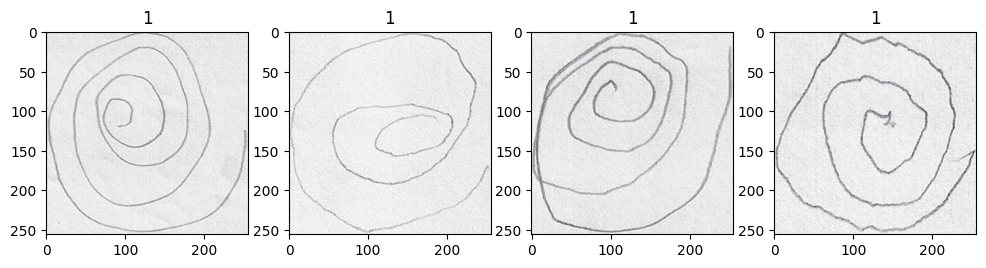

In [5]:
fig, ax = plt.subplots(ncols=4,figsize=(12,12))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
batch[1]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [9]:
batch[0].max()
batch[0].min()

0.0

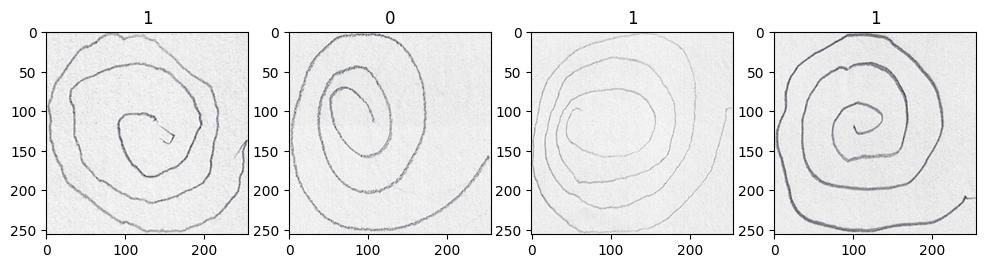

In [10]:
fig, ax = plt.subplots(ncols=4,figsize=(12,12))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.92156863, 0.92156863, 0.92156863],
          [0.9098039 , 0.9098039 , 0.9098039 ],
          [0.9137255 , 0.9137255 , 0.9137255 ],
          ...,
          [0.92156863, 0.92156863, 0.92156863],
          [0.92941177, 0.92941177, 0.92941177],
          [0.8784314 , 0.8784314 , 0.8784314 ]],
 
         [[0.91764706, 0.91764706, 0.91764706],
          [0.9254902 , 0.9254902 , 0.9254902 ],
          [0.9254902 , 0.9254902 , 0.9254902 ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.9411765 , 0.9411765 , 0.9411765 ],
          [0.91764706, 0.91764706, 0.91764706]],
 
         [[0.92156863, 0.92156863, 0.92156863],
          [0.9254902 , 0.9254902 , 0.9254902 ],
          [0.92156863, 0.92156863, 0.92156863],
          ...,
          [0.89411765, 0.89411765, 0.89411765],
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.9019608 , 0.9019608 , 0.9019608 ]],
 
         ...,
 
         [[0.9254902 , 0.9254902 , 0.9254902 ],
          [0.92941

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

2

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [17]:
model = Sequential()


In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [23]:
hist = model.fit(train, epochs=48, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/48
2/2 [==============================] - 5s 2s/step - loss: 1.5217 - accuracy: 0.4688
Epoch 2/48
2/2 [==============================] - 2s 1s/step - loss: 0.7634 - accuracy: 0.5625
Epoch 3/48
2/2 [==============================] - 2s 1s/step - loss: 0.7151 - accuracy: 0.4688
Epoch 4/48
2/2 [==============================] - 3s 1s/step - loss: 0.6961 - accuracy: 0.5938
Epoch 5/48
2/2 [==============================] - 2s 1s/step - loss: 0.6868 - accuracy: 0.6875
Epoch 6/48
2/2 [==============================] - 3s 1s/step - loss: 0.6831 - accuracy: 0.5312
Epoch 7/48
2/2 [==============================] - 3s 1s/step - loss: 0.6793 - accuracy: 0.5000
Epoch 8/48
2/2 [==============================] - 2s 1s/step - loss: 0.7131 - accuracy: 0.5312
Epoch 9/48
2/2 [==============================] - 2s 1s/step - loss: 0.6801 - accuracy: 0.4375
Epoch 10/48
2/2 [==============================] - 2s 1s/step - loss: 0.6750 - accuracy: 0.5000
Epoch 11/48
2/2 [==============================] 

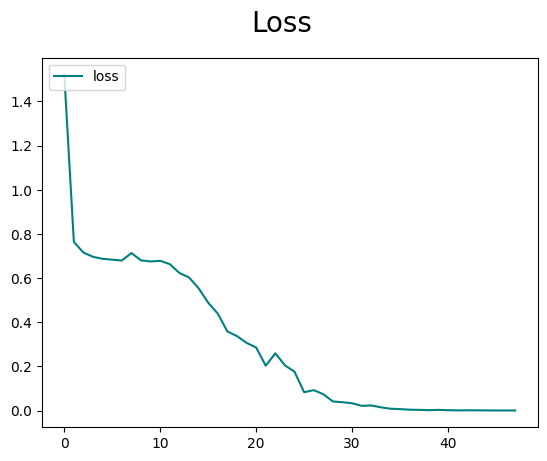

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

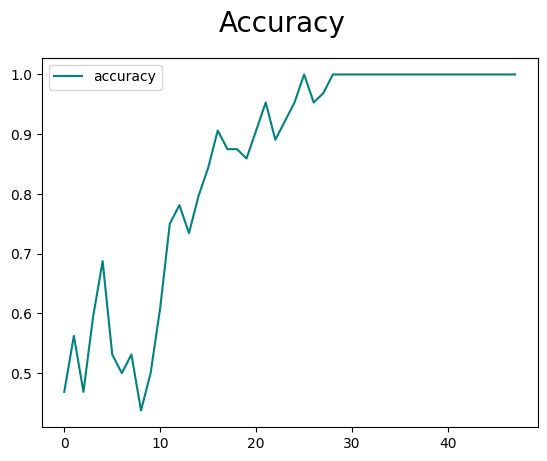

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [29]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [30]:
import cv2

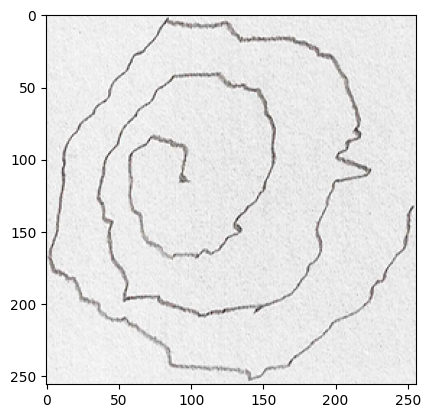

In [31]:
img = cv2.imread('drawings/spiral/testing/parkinson/V03PE04.png')
plt.imshow(img)
plt.show()

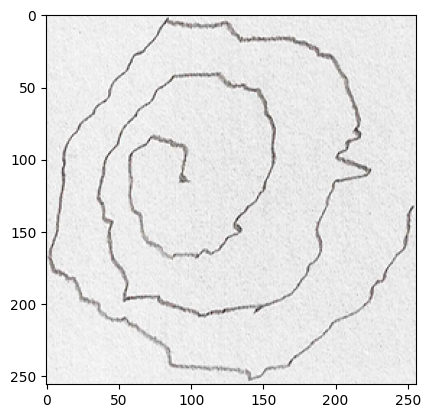

In [32]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 321ms/step


In [34]:
yhat

array([[0.9999996]], dtype=float32)

In [35]:
if yhat < 0.6: 
    print(f'Predicted class is Healthy')
else:
    print(f'Predicted class is Parkinson')

Predicted class is Parkinson


In [36]:
model.save('spiral.h5')